# Support Vector Machines

Let's create the same fake income / age clustered data that we used for our K-Means clustering example:

In [1]:
import numpy as np
def createData(n,k):
    np.random.seed(1234)
    pointspercluster = float(n)/k
    X = []
    y = []
    for cluster in range(k):
        income = np.random.uniform(20000.0,200000.0)
        age = np.random.uniform(20.0,70.0)
        for points in range(int(pointspercluster)):
            X.append([np.random.normal(income,10000.0),np.random.uniform(age,2.0)])
            y.append(cluster)
    X = np.array(X)
    y = np.array(y)
    return X,y

In [2]:
feature,y = createData(100,5)

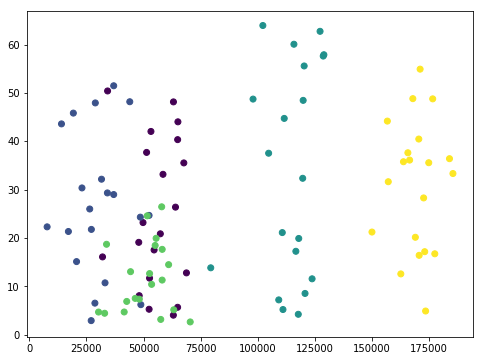

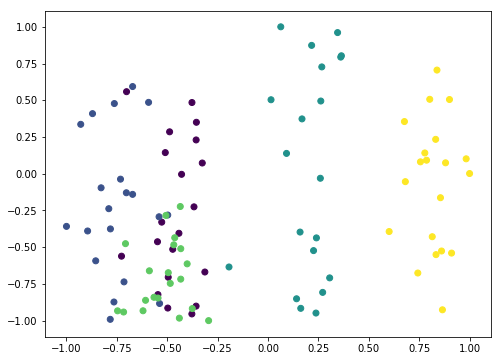

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(-1,1)).fit(feature)
scaled_feature = scalar.transform(feature)
plt.figure(figsize=(8,6))
plt.scatter(feature[:,0],feature[:,1],c=y.astype(np.float))
plt.show()
plt.figure(figsize=(8,6))
plt.scatter(scaled_feature[:,0],scaled_feature[:,1],c=y.astype(np.float))
plt.show()

Now we'll use linear SVC to partition our graph into clusters:

In [4]:
from sklearn import svm,datasets
svc = svm.SVC(kernel='linear',C=1.0).fit(scaled_feature,y)

By setting up a dense mesh of points in the grid and classifying all of them, we can render the regions of each cluster as distinct colors:

In [5]:
def predictions(clf):
    xx,yy=np.meshgrid(np.arange(-1,1,0.001),np.arange(-1,1,0.001))
    npx=np.ravel(xx)
    npy=np.ravel(yy)
    samplrpoints=np.c_[npx,npy]
    Z=clf.predict(samplrpoints)
    Z=Z.reshape(xx.shape)
    plt.figure(figsize=(8,6))
    plt.contourf(xx,yy,Z,cmap=plt.cm.Paired,alpha=0.8)
    plt.scatter(scaled_feature[:,0],scaled_feature[:,1],c=y.astype(np.float))
    plt.show()

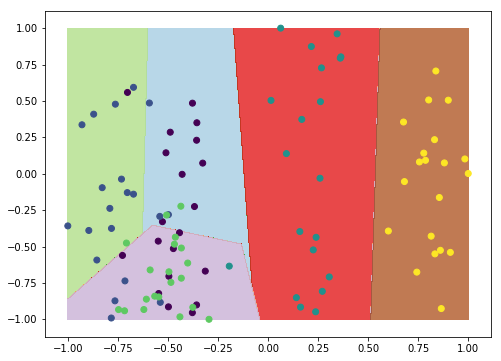

In [6]:
predictions(svc)

Or just use predict for a given point:

In [7]:
print(svc.predict(scalar.transform([[200000, 40]])))

[4]
